<a href="https://colab.research.google.com/github/GOVINDFROMINDIA/Twitter-Scam-Victims/blob/main/gnn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch_geometric.data import Data

# Load your custom dataset
data = torch.load('processed_data.pt')

# Print dataset information
print(f'Dataset:')
print('======================')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of features: {data.num_node_features}')
print(f'Number of classes: {len(set(data.y.numpy()))}')

# Print the data object
print(data)

# Example of accessing data
print("Node features:")
print(data.x)
print("Edge index:")
print(data.edge_index)
print("Labels:")
print(data.y)


Dataset:
Number of nodes: 150
Number of edges: 461
Number of features: 100
Number of classes: 3
Data(x=[150, 100], edge_index=[2, 461], y=[150])
Node features:
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.3768],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.1455, 0.1099],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.1311, 0.0000, 0.0000,  ..., 0.1135, 0.1017, 0.4606],
        [0.1335, 0.0000, 0.0000,  ..., 0.1156, 0.1035, 0.3126],
        [0.1370, 0.0000, 0.0000,  ..., 0.0000, 0.1062, 0.2407]])
Edge index:
tensor([[  0,   0,   0,   1,   1,   1,   2,   2,   2,   3,   3,   4,   5,   5,
           6,   7,   7,   8,   9,   9,  10,  10,  11,  11,  11,  12,  13,  13,
          14,  14,  14,  14,  15,  16,  16,  16,  17,  18,  19,  20,  21,  22,
          23,  24,  25,  26,  27,  27,  28,  28,  29,  30,  30,  31,  31,  32,
          32,  33,  33,  34,  34,  35,  35,  36,  36,  37,  37,  38,  38,  39,
          39,  40,  41,  42,  43,  

<ipython-input-2-6ea29ec577a2>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('processed_data.pt')


In [1]:
pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00



The code defines a Graph Convolutional Network (GCN) using PyTorch Geometric. It imports necessary libraries, loads a dataset, and sets up a GCN model with two layers. The model transforms node features through these layers, applies ReLU activation and dropout, and predicts class labels. The model is initialized with 16 hidden channels and its structure is printed.


The GCN model uses node features and graph structure to predict labels for nodes in a graph. The model learns from existing labels to improve its ability to classify nodes accurately.

In [3]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Load your custom dataset
data = torch.load('processed_data.pt')

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_node_features, hidden_channels)  # Updated to use num_node_features
        self.conv2 = GCNConv(hidden_channels, len(set(data.y.numpy())))  # Updated to use the number of unique classes

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model
model = GCN(hidden_channels=16)
print(model)


GCN(
  (conv1): GCNConv(100, 16)
  (conv2): GCNConv(16, 3)
)


<ipython-input-3-b74c677679b5>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('processed_data.pt')



This code loads a graph dataset, defines and initializes a Graph Convolutional Network (GCN) model, evaluates the model to get node embeddings, and visualizes these embeddings in 2D using t-SNE

VISUALISATION OF UNTRAINED MODEL

<ipython-input-4-45a7e9423870>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('processed_data.pt')


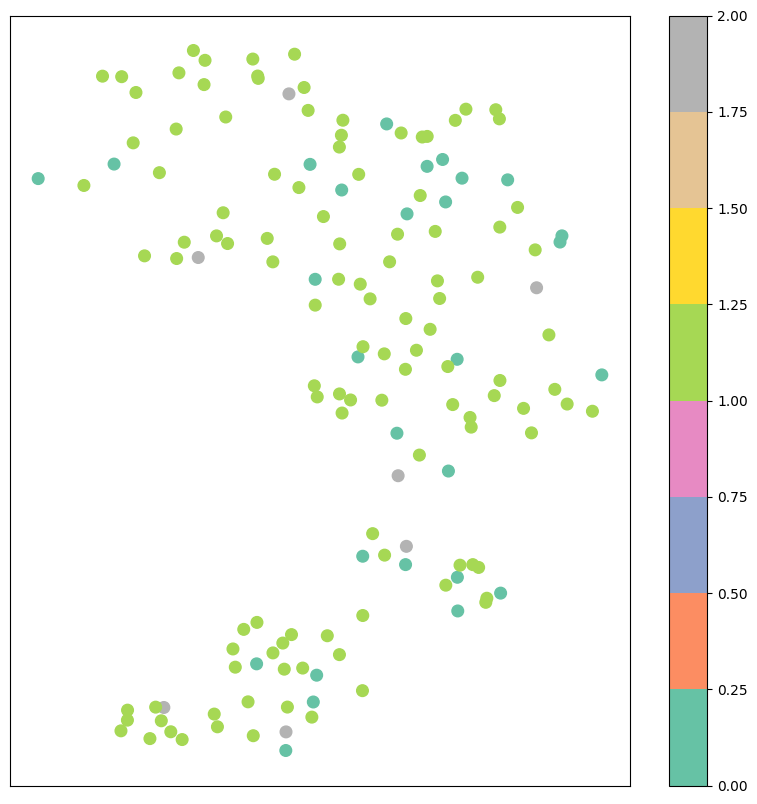

In [4]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load your custom dataset
data = torch.load('processed_data.pt')

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, len(set(data.y.numpy())))

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model
model = GCN(hidden_channels=16)

# Make sure to set the model to evaluation mode and use the data for inference
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)

# Function to visualize embeddings using t-SNE
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.colorbar()
    plt.show()

# Get the node embeddings and node labels
embeddings = out
node_labels = data.y.numpy()

# Visualize the embeddings
visualize(embeddings, node_labels)


<ipython-input-5-521fe50ad34c>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('processed_data.pt')


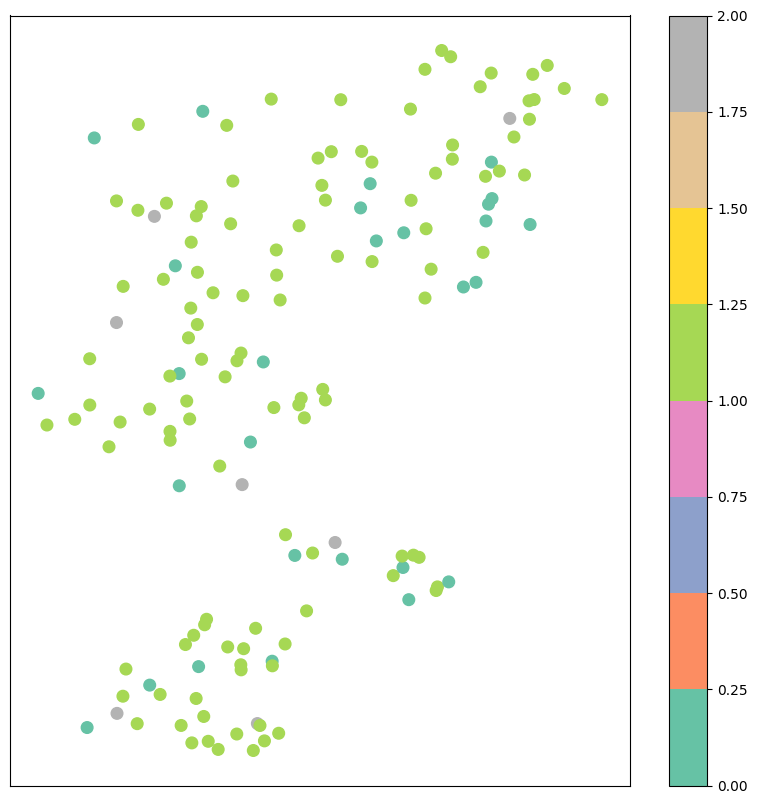

In [5]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load your custom dataset
data = torch.load('processed_data.pt')

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, len(set(data.y.numpy())))

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model
model = GCN(hidden_channels=16)

# Make sure to set the model to evaluation mode and use the data for inference
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)

# Function to visualize embeddings using t-SNE
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])

    scatter = plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.colorbar(scatter)
    plt.show()

# Visualize the node embeddings with the node labels as colors
visualize(out, color=data.y.numpy())



The code provides a comprehensive workflow for training and evaluating a Graph Convolutional Network (GCN) with PyTorch Geometric. It begins by setting up and preparing graph data, including creating train and test masks to partition the data. The GCN model is then defined with two convolutional layers, incorporating ReLU activation and dropout. The model is trained using a defined optimizer and loss function, with performance evaluated on a test set. Finally, the code visualizes node embeddings in 2D using t-SNE, allowing for an intuitive representation of the learned features.

<ipython-input-6-bf06a752d980>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('processed_data.pt')


Epoch: 001, Loss: 1.2083, Test Accuracy: 0.2333
Epoch: 002, Loss: 1.1014, Test Accuracy: 0.7333
Epoch: 003, Loss: 1.0242, Test Accuracy: 0.7333
Epoch: 004, Loss: 0.9601, Test Accuracy: 0.7333
Epoch: 005, Loss: 0.9207, Test Accuracy: 0.7333
Epoch: 006, Loss: 0.8977, Test Accuracy: 0.7333
Epoch: 007, Loss: 0.8491, Test Accuracy: 0.7333
Epoch: 008, Loss: 0.8135, Test Accuracy: 0.7333
Epoch: 009, Loss: 0.7668, Test Accuracy: 0.7333
Epoch: 010, Loss: 0.7681, Test Accuracy: 0.7333
Epoch: 011, Loss: 0.7459, Test Accuracy: 0.7333
Epoch: 012, Loss: 0.7595, Test Accuracy: 0.7333
Epoch: 013, Loss: 0.7630, Test Accuracy: 0.7333
Epoch: 014, Loss: 0.7422, Test Accuracy: 0.7333
Epoch: 015, Loss: 0.7277, Test Accuracy: 0.7333
Epoch: 016, Loss: 0.7641, Test Accuracy: 0.7333
Epoch: 017, Loss: 0.7523, Test Accuracy: 0.7333
Epoch: 018, Loss: 0.7042, Test Accuracy: 0.7333
Epoch: 019, Loss: 0.6849, Test Accuracy: 0.7333
Epoch: 020, Loss: 0.7135, Test Accuracy: 0.7333
Epoch: 021, Loss: 0.6911, Test Accuracy:

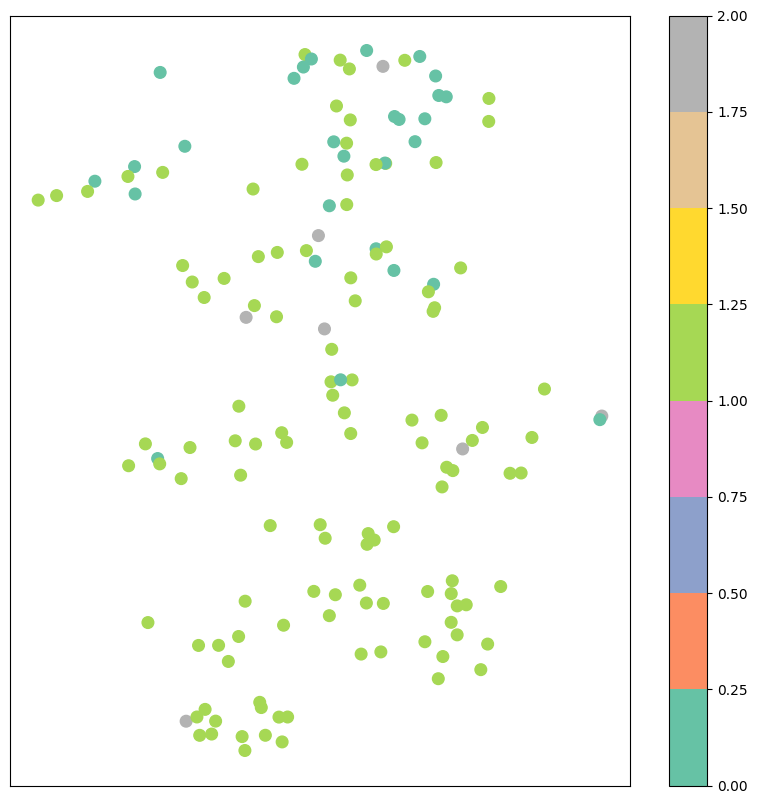

In [6]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load your custom dataset
data = torch.load('processed_data.pt')

# Manually create train and test masks
num_nodes = data.x.size(0)
indices = torch.randperm(num_nodes)
split = int(num_nodes * 0.8)  # 80% for training, 20% for testing

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[indices[:split]] = True
test_mask[indices[split:]] = True

# Add these masks to your data object
data.train_mask = train_mask
data.test_mask = test_mask

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, len(set(data.y.numpy())))

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model, optimizer, and loss function
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

# Define the training function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

# Define the testing function
def test():
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = out.argmax(dim=1)
        test_correct = pred[data.test_mask] == data.y[data.test_mask]
        test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
    return test_acc

# Training loop
for epoch in range(1, 101):
    loss = train()
    test_acc = test()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Visualize the node embeddings
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])

    scatter = plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.colorbar(scatter)
    plt.show()

visualize(out, color=data.y.numpy())


In [7]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')



Test Accuracy: 0.7333


O-> LOW SCAM
1-> MEDIUM SCAM
2-> HIGH SCAM

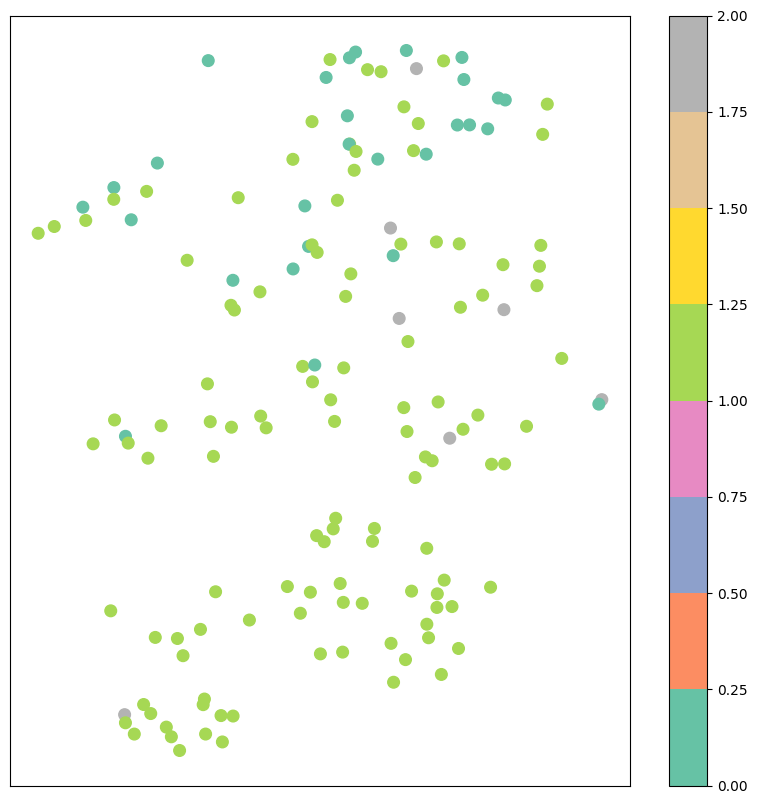

In [8]:
model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)

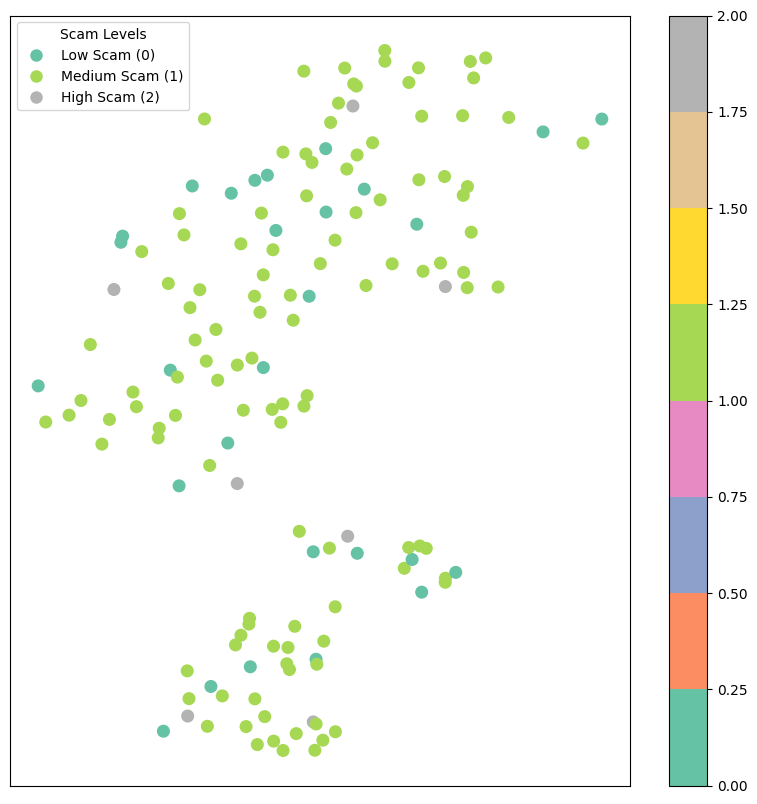

In [11]:
def visualize2(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])

    # Create a scatter plot
    scatter = plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")

    # Create a legend
    legend_labels = ['Low Scam (0)', 'Medium Scam (1)', 'High Scam (2)']
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(3)]
    plt.legend(handles, legend_labels, title="Scam Levels")

    plt.colorbar(scatter)
    plt.show()

visualize2(out, color=data.y.numpy())


<ipython-input-10-48870f4399c0>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('processed_data.pt')


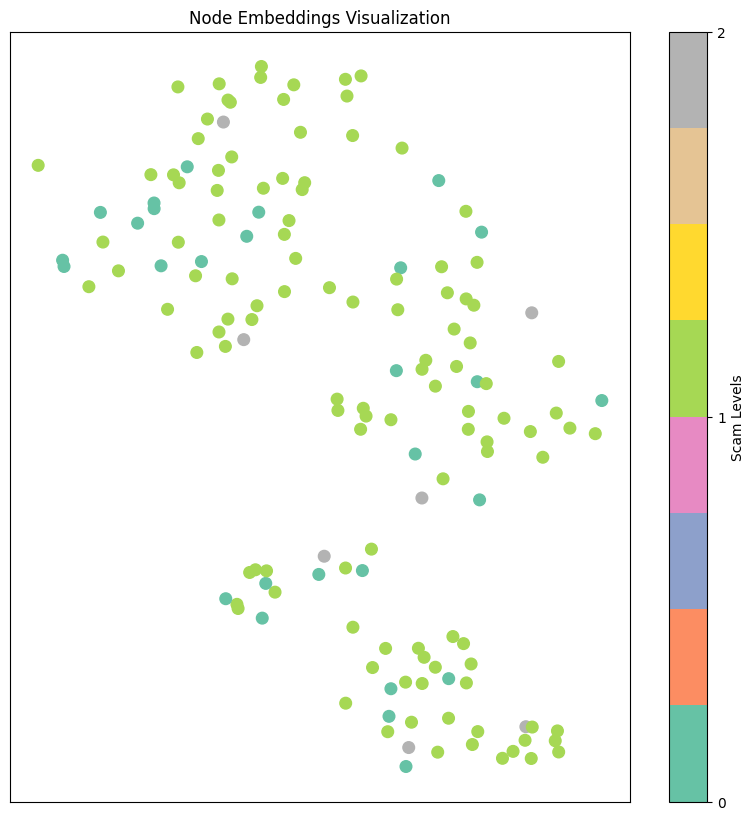

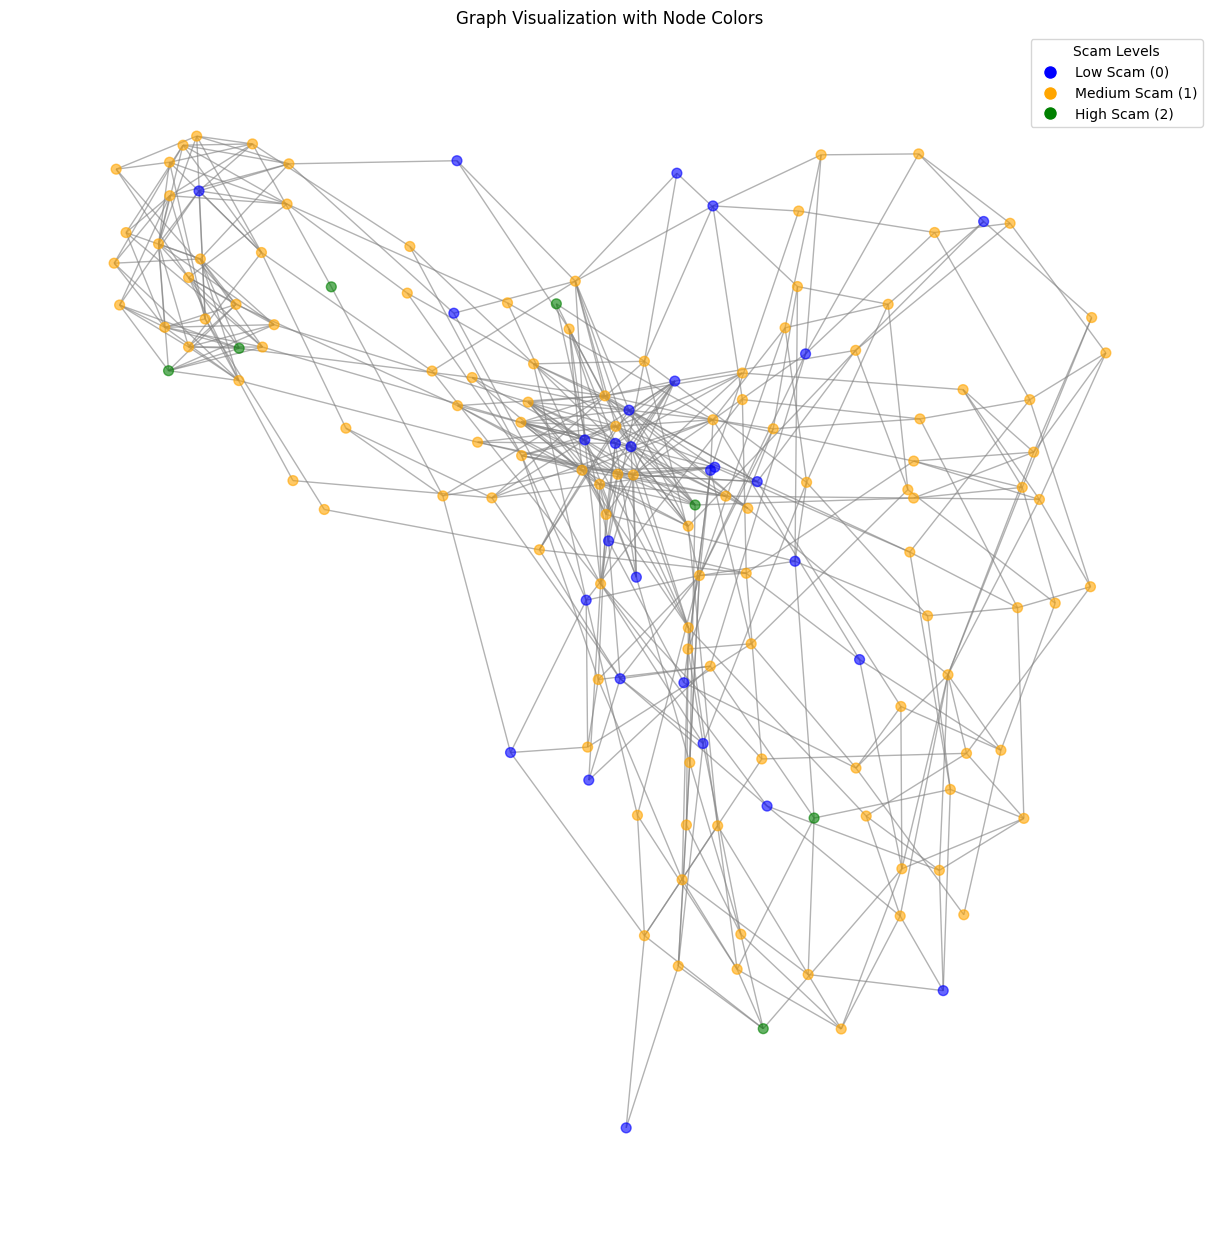

In [10]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import networkx as nx
import numpy as np

# Load your custom dataset
data = torch.load('processed_data.pt')

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, len(set(data.y.numpy())))

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model and load it for inference
model = GCN(hidden_channels=16)
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)

# Convert to NumPy for visualization
embeddings = out.detach().cpu().numpy()
node_labels = data.y.numpy()

# Function to visualize embeddings using t-SNE
def visualize_embeddings(embeddings, labels):
    z = TSNE(n_components=2).fit_transform(embeddings)
    plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])

    scatter = plt.scatter(z[:, 0], z[:, 1], s=70, c=labels, cmap="Set2")
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Scam Levels')
    plt.title('Node Embeddings Visualization')
    plt.show()

visualize_embeddings(embeddings, node_labels)

# Function to create and visualize a graph
def visualize_graph(data, node_colors):
    G = nx.Graph()

    # Add nodes with node labels
    for i in range(data.num_nodes):
        G.add_node(i, label=node_colors[i])

    # Add edges
    edge_index = data.edge_index.numpy()
    for i in range(edge_index.shape[1]):
        G.add_edge(edge_index[0, i], edge_index[1, i])

    pos = nx.spring_layout(G, seed=1234567)
    color_map = {0: 'blue', 1: 'orange', 2: 'green'}
    colors = [color_map[node_colors[i]] for i in range(data.num_nodes)]

    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, node_color=colors, with_labels=False, node_size=50, edge_color='gray', alpha=0.6)
    plt.title('Graph Visualization with Node Colors')

    # Create a custom legend
    from matplotlib.lines import Line2D
    legend_labels = ['Low Scam (0)', 'Medium Scam (1)', 'High Scam (2)']
    legend_colors = [color_map[i] for i in range(3)]
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=legend_colors[i], markersize=10) for i in range(3)]
    plt.legend(legend_handles, legend_labels, title="Scam Levels")

    plt.show()

visualize_graph(data, node_labels)


<ipython-input-12-2ed2ea90f06d>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('processed_data.pt')


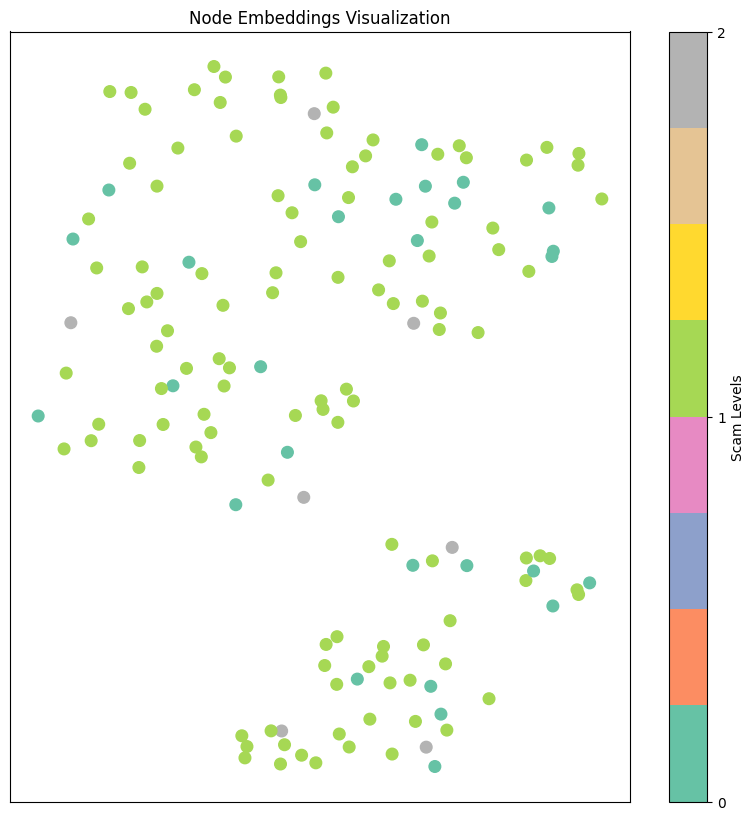

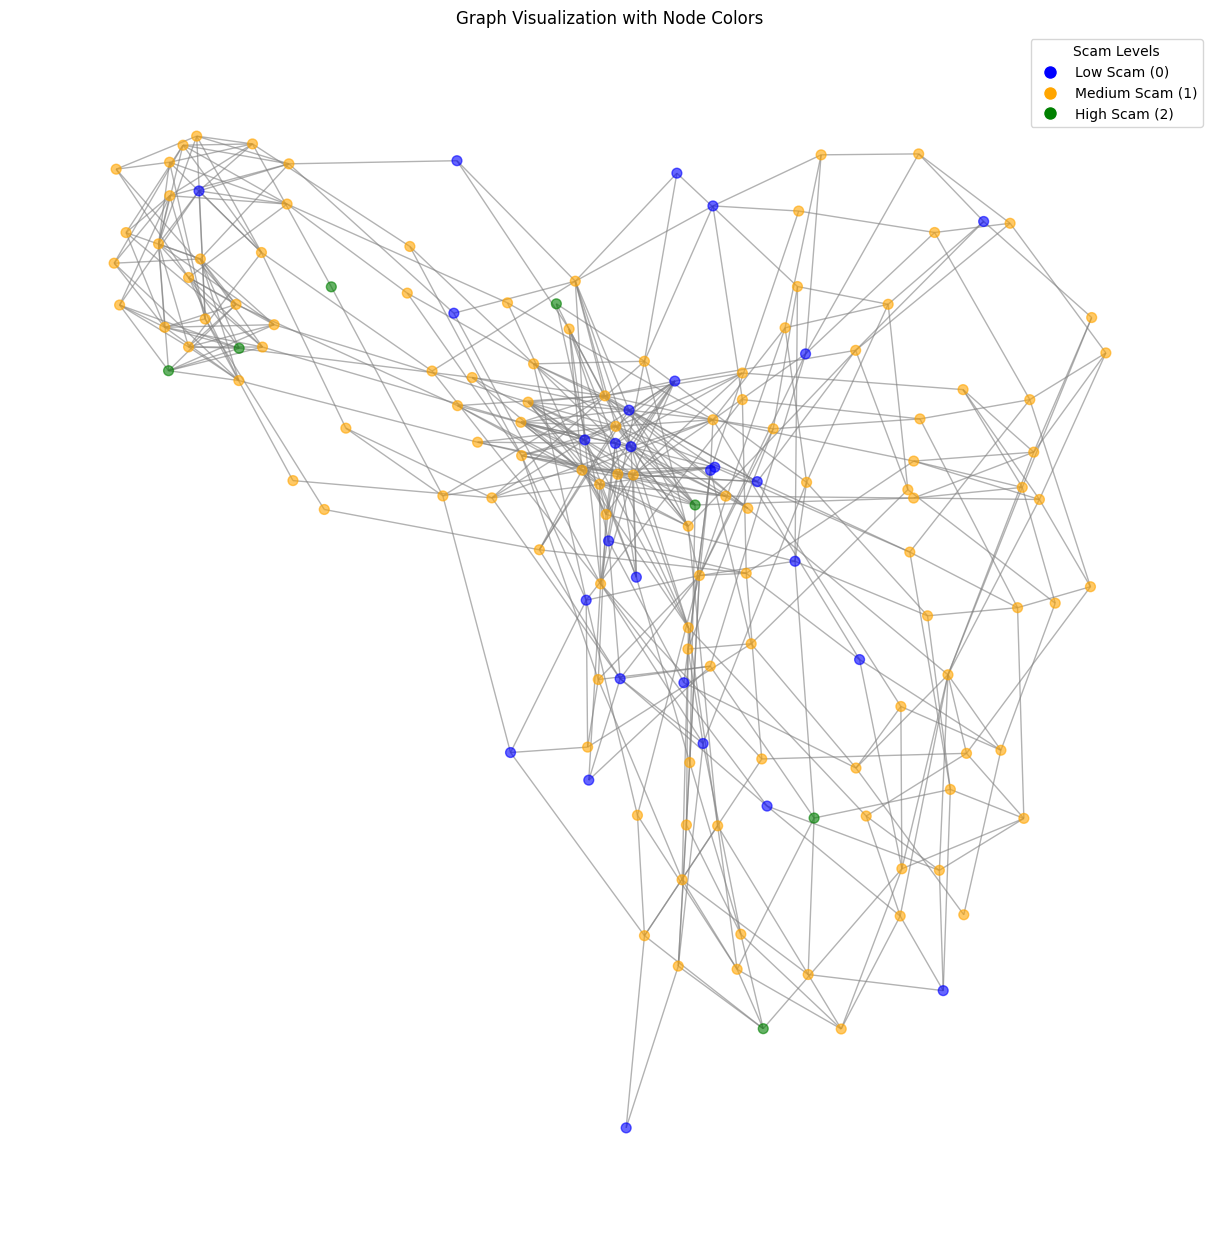

In [12]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import networkx as nx
from matplotlib.lines import Line2D

# Load your custom dataset
data = torch.load('processed_data.pt')

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, len(set(data.y.numpy())))

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model and load it for inference
model = GCN(hidden_channels=16)
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)

# Convert to NumPy for visualization
embeddings = out.detach().cpu().numpy()
node_labels = data.y.numpy()

# Function to visualize embeddings using t-SNE
def visualize_embeddings(embeddings, labels):
    z = TSNE(n_components=2).fit_transform(embeddings)
    plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])

    scatter = plt.scatter(z[:, 0], z[:, 1], s=70, c=labels, cmap="Set2")
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Scam Levels')
    plt.title('Node Embeddings Visualization')
    plt.show()

visualize_embeddings(embeddings, node_labels)

# Function to create and visualize a graph
def visualize_graph(data, node_colors):
    G = nx.Graph()

    # Add nodes with node labels
    for i in range(data.num_nodes):
        G.add_node(i, label=node_colors[i])

    # Add edges
    edge_index = data.edge_index.numpy()
    for i in range(edge_index.shape[1]):
        G.add_edge(edge_index[0, i], edge_index[1, i])

    pos = nx.spring_layout(G, seed=1234567)
    color_map = {0: 'blue', 1: 'orange', 2: 'green'}
    colors = [color_map[node_colors[i]] for i in range(data.num_nodes)]

    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, node_color=colors, with_labels=False, node_size=50, edge_color='gray', alpha=0.6)
    plt.title('Graph Visualization with Node Colors')

    # Create a custom legend
    legend_labels = ['Low Scam (0)', 'Medium Scam (1)', 'High Scam (2)']
    legend_colors = [color_map[i] for i in range(3)]
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=legend_colors[i], markersize=10) for i in range(3)]
    plt.legend(handles=legend_handles, labels=legend_labels, title="Scam Levels")

    plt.show()

visualize_graph(data, node_labels)


In [14]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import networkx as nx
import numpy as np

# Load your custom dataset
data = torch.load('processed_data.pt')

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(data.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, len(set(data.y.numpy())))

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize the model and load it for inference
model = GCN(hidden_channels=16)
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)

# Convert to NumPy for visualization
embeddings = out.detach().cpu().numpy()
node_labels = data.y.numpy()

# Convert edge_index to a list of edges
edge_index = data.edge_index.numpy()
edges = [(edge_index[0, i], edge_index[1, i]) for i in range(edge_index.shape[1])]

# Use t-SNE to reduce dimensions
z = TSNE(n_components=2).fit_transform(embeddings)

# Create Plotly figure
fig = go.Figure()

# Add nodes
fig.add_trace(go.Scatter(
    x=z[:, 0],
    y=z[:, 1],
    mode='markers',
    marker=dict(
        size=10,
        color=node_labels,  # Color by node labels
        colorscale='Viridis',
        colorbar=dict(title='Scam Level'),
        line=dict(width=2, color='Black')
    ),
    text=[f'Node {i}<br>Label: {label}' for i, label in enumerate(node_labels)],
    hoverinfo='text'
))

# Add edges
for edge in edges:
    fig.add_trace(go.Scatter(
        x=[z[edge[0], 0], z[edge[1], 0]],
        y=[z[edge[0], 1], z[edge[1], 1]],
        mode='lines',
        line=dict(width=0.5, color='gray'),
        hoverinfo='none'
    ))

# Update layout
fig.update_layout(
    title='Interactive Graph Visualization',
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    hovermode='closest'
)

# Show the figure
fig.show()


<ipython-input-14-5f7ca56949de>:11: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

